In [1]:
%matplotlib inline
from IPython import display
import glob
from utils_demo import *

import os
import sys
sys.path.append(os.path.abspath('../simulation'))

from PIL import Image
import matplotlib.pyplot as plt

from tqdm import tqdm

from unity_simulator.comm_unity import UnityCommunication
from unity_simulator import utils_viz

## Customize Environment
```
try to change the room numbers of environment 4. The next codes I tried to keep living room and remove other rooms.
```

In [14]:
import json

# Reset the environment and retrieve the initial graph structure
comm.reset(4)
s, graph = comm.environment_graph()

# Find all furniture IDs
furniture_id = [node["id"] for node in graph['nodes'] if node["category"] == "Furniture"]
print("Furniture IDs:", furniture_id)
print("Number of furniture items:", len(furniture_id))  # Result: 145

# Show available rooms in the graph
available_rooms_in_graph = [node['class_name'] for node in graph['nodes'] if node["category"] == 'Rooms']
available_rooms_in_graph_id = [node['id'] for node in graph['nodes'] if node["category"] == 'Rooms']
print("Available rooms:", available_rooms_in_graph)
print("Room IDs:", available_rooms_in_graph_id)



# Find edges attached to the living room, excluding furniture
living_room_id = 11
edges_attached_livingroom_id = [
    edge["from_id"] for edge in graph['edges'] if int(edge["to_id"]) == living_room_id and edge["from_id"] not in furniture_id
]
edges_attached_livingroom = [
    edge for edge in graph['edges'] if int(edge["to_id"]) == living_room_id and edge["from_id"] not in furniture_id
]

# Include the living room ID in the list of nodes to keep
edges_attached_livingroom_id.append(living_room_id)

# Construct a subgraph based on nodes and edges connected to the living room, excluding furniture
my_graph = {
    "nodes": [node for node in graph['nodes'] if int(node["id"]) in edges_attached_livingroom_id],
    "edges": edges_attached_livingroom
}

print("Number of nodes in subgraph:", len(my_graph['nodes']))
print("Number of edges in subgraph:", len(my_graph['edges']))
print(json.dumps(my_graph, indent=4))

# Expand the scene with the constructed subgraph
success, message = comm.expand_scene(my_graph)
print("Expand scene success:", success)

# Retrieve and print the updated graph
s, new_graph = comm.environment_graph()
print("Number of nodes in updated graph:", len(new_graph['nodes']))
print("Number of edges in updated graph:", len(new_graph['edges']))

# Print the updated graph in a formatted JSON string
print(json.dumps(new_graph, indent=4))

Furniture IDs: [27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341]
Number of furniture items: 145
Available rooms: ['livingroom', 'kitchen', 'bedroom', 'bathroom']
Room IDs: [11, 111, 214, 276]
Number of nodes in subgraph: 49
Number of edges in subgraph: 48
{
    "nodes": [
        {
            "id": 11,
            "category": "Rooms",
            "class_name": "livingroom

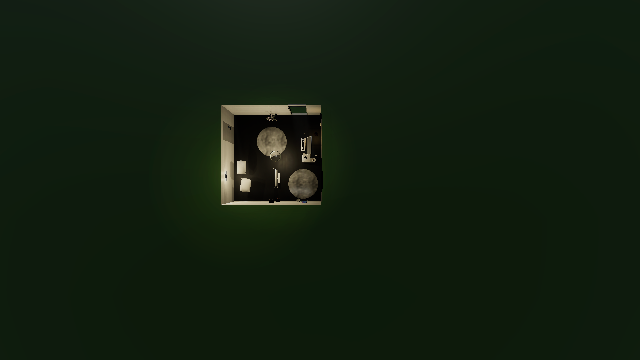

In [13]:
imgs_final = get_scene_cameras(comm, [-1])
display_grid_img(imgs_final, nrows=1)

In [ ]:
imgs_final = get_scene_cameras(comm, [-2])
display_grid_img(imgs_final, nrows=1)

UnityCommunicationException: HTTPConnectionPool(host='127.0.0.1', port=8080): Read timed out. (read timeout=30)

In [ ]:
# Check the number of camcategoryeras
s, cam_count = comm.camera_count()
print(cam_count)
# cam_count # 73
indices = [i for i in range(cam_count)]
test_imgs_prev = display_scene_cameras(comm, indices, nrows=15)
display.display(test_imgs_prev)

## For Fun

check all the enviroment class name

In [10]:
class_names = []
for scene_id in tqdm(range(50)):
    comm.reset(scene_id)
    comm.remove_terrain()
    s, graph = comm.environment_graph()
    class_name = graph['nodes'][0]['class_name']
    if class_name not in class_names:
        class_names.append(class_name)
print(class_names)


  0%|          | 0/50 [00:00<?, ?it/s]

UnityCommunicationException: HTTPConnectionPool(host='127.0.0.1', port=8080): Read timed out. (read timeout=30)

In [ ]:
comm.reset(4)

In [ ]:
# Check the number of cameras
s, cam_count = comm.camera_count()
# cam_count # 73
indices = [i for i in range(cam_count)]
imgs_prev = display_scene_cameras(comm, indices, nrows=15)
display.display(imgs_prev)

In [ ]:
s, graph = comm.environment_graph()
for i in range(len(graph['nodes'])):
    print(graph['nodes'][i])

In [ ]:
for i in range(len(graph['edges'])):
    print(graph['edges'][i])

In [ ]:
# # Filter nodes
# graph['nodes'] = [node for node in graph['nodes'] if node['category'] in ['Rooms', 'Floor', 'Walls', 'Ceiling']]

# # Filter edges
# graph['edges'] = [edge for edge in graph['edges'] if int(edge['to_id']) in range(11, 24)]


In [ ]:
graph['nodes'] = [node for node in graph['nodes'] if node['category'] in ['Rooms']]
graph['edges'] = [edge for edge in graph['edges'] if int(edge['to_id'])==11]

In [ ]:
success, message = comm.expand_scene(graph)

In [ ]:
# Check the number of camcategoryeras
s, cam_count = comm.camera_count()
# cam_count # 73
indices = [i for i in range(cam_count)]
test_imgs_prev = display_scene_cameras(comm, indices, nrows=15)
IPython.display.display(test_imgs_prev)

In [ ]:
graph_dict = {
            'nodes': [
                {"id": 1, 'class_name': "kitchen", "category": "Rooms", "properties": [], "states": []},
                {"id": 2, 'class_name': "bedroom", "category": "Rooms", "properties": [], "states": []},
                {"id": 3, 'class_name': "home_office", "category": "Rooms", "properties": [], "states": []},
                {"id": 4, 'class_name': "bathroom", "category": "Rooms", "properties": [], "states": []},
                {"id": 5, 'class_name': "character", "category": "", "properties": [], "states": []},
                {"id": 6, 'class_name': "door", "category": "", "properties": ["CAN_OPEN"], "states": ["OPEN"]},
                {"id": 7, 'class_name': "door", "category": "", "properties": ["CAN_OPEN"], "states": ["OPEN"]},
                {"id": 8, 'class_name': "door", "category": "", "properties": ["CAN_OPEN"], "states": ["OPEN"]},
            ],
            'edges': [
                {"from_id": 5, "to_id": 2, "relation_type": "INSIDE"},
                {"from_id": 6, "to_id": 1, "relation_type": "BETWEEN"},
                {"from_id": 6, "to_id": 2, "relation_type": "BETWEEN"},
                {"from_id": 7, "to_id": 1, "relation_type": "BETWEEN"},
                {"from_id": 7, "to_id": 3, "relation_type": "BETWEEN"},
                {"from_id": 8, "to_id": 3, "relation_type": "BETWEEN"},
                {"from_id": 8, "to_id": 4, "relation_type": "BETWEEN"},
            ]}

success, message = comm.expand_scene(graph_dict)

s, new_graph = comm.environment_graph()
print(len(new_graph['nodes']))
print(len(new_graph['edges']))

# Check the number of camcategoryeras
s, cam_count = comm.camera_count()
# cam_count # 73
indices = [i for i in range(cam_count)]
test_imgs_prev = display_scene_cameras(comm, indices, nrows=15)
IPython.display.display(test_imgs_prev)


In [ ]:
import json
from evolving_graph import utils
from evolving_graph.environment import EnvironmentGraph
from evolving_graph.execution import ScriptExecutor
from evolving_graph.scripts import read_script


def example_5():

    properties_data = utils.load_properties_data()
    object_states = utils.load_object_states()
    object_placing = utils.load_object_placing()
    graph_dict = {
            'nodes': [
                {"id": 1, 'class_name': "kitchen", "category": "Rooms", "properties": [], "states": []},
                {"id": 2, 'class_name': "bedroom", "category": "Rooms", "properties": [], "states": []},
                {"id": 3, 'class_name': "home_office", "category": "Rooms", "properties": [], "states": []},
                {"id": 4, 'class_name': "bathroom", "category": "Rooms", "properties": [], "states": []},
                {"id": 5, 'class_name': "character", "category": "", "properties": [], "states": []},
                {"id": 6, 'class_name': "door", "category": "", "properties": ["CAN_OPEN"], "states": ["OPEN"]},
                {"id": 7, 'class_name': "door", "category": "", "properties": ["CAN_OPEN"], "states": ["OPEN"]},
                {"id": 8, 'class_name': "door", "category": "", "properties": ["CAN_OPEN"], "states": ["OPEN"]},
            ],
            'edges': [
                {"from_id": 5, "to_id": 2, "relation_type": "INSIDE"},
                {"from_id": 6, "to_id": 1, "relation_type": "BETWEEN"},
                {"from_id": 6, "to_id": 2, "relation_type": "BETWEEN"},
                {"from_id": 7, "to_id": 1, "relation_type": "BETWEEN"},
                {"from_id": 7, "to_id": 3, "relation_type": "BETWEEN"},
                {"from_id": 8, "to_id": 3, "relation_type": "BETWEEN"},
                {"from_id": 8, "to_id": 4, "relation_type": "BETWEEN"},
            ]}

    helper = utils.graph_dict_helper(properties_data, object_placing, object_states, max_nodes=15)
    helper.initialize(graph_dict)

    print()
    print('Example 5')
    print('---------')
    script = read_script('example_scripts/example_script_4.txt')
    with open('example_scripts/example_precond_script_4.json', 'r') as f:
        precond = json.load(f)

    id_mapping = {}
    id_mapping, first_room, room_mapping = helper.add_missing_object_from_script(script, precond, graph_dict, id_mapping)
    print(id_mapping)

    # add random objects
    graph = EnvironmentGraph(graph_dict)

    name_equivalence = utils.load_name_equivalence()
    executor = ScriptExecutor(graph, name_equivalence)
    state = executor.execute(script)
    if state is None:
        print('Script is not executable, since {}'.format(executor.info.get_error_string()))
    else:
        print('Script is executable')

In [ ]:
example_5()